In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder  
from sklearn import tree
df=pd.read_csv('C:/Users/hp/Downloads/Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [28]:
data = df.drop(['RowNumber', 'Surname', 'Geography', 'Gender', 'Card Type'], axis=1)
data.head()    

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425


In [29]:
data.isnull().sum()

CustomerId            0
CreditScore           0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Point Earned          0
dtype: int64

In [30]:
data.shape

(10000, 13)

In [31]:
new_balance = data["Balance"].mean()
new_active = data["IsActiveMember"].mean()

In [32]:
def create_purchase_label(row):
    if row['IsActiveMember'] > new_active and row['Balance'] > new_balance:
        return 1
    else:
        return 0

In [33]:
data['PurchaseLabel'] = data.apply(create_purchase_label, axis=1)

In [34]:
print(data[['Balance', 'IsActiveMember', 'PurchaseLabel']])

        Balance  IsActiveMember  PurchaseLabel
0          0.00               1              0
1      83807.86               1              1
2     159660.80               0              0
3          0.00               0              0
4     125510.82               1              1
...         ...             ...            ...
9995       0.00               0              0
9996   57369.61               1              0
9997       0.00               1              0
9998   75075.31               0              0
9999  130142.79               0              0

[10000 rows x 3 columns]


In [35]:
(data['PurchaseLabel']).sum()

3016

In [36]:
y = data['PurchaseLabel']
x = data.drop(['PurchaseLabel'] , axis=1 )

In [37]:
x.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425


In [38]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: PurchaseLabel, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.4, 0.8333333333333334, 'x[7] <= 0.5\ngini = 0.419\nsamples = 6500\nvalue = [4558, 1942]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 3137\nvalue = [3137, 0]'),
 Text(0.6, 0.5, 'x[4] <= 76415.082\ngini = 0.488\nsamples = 3363\nvalue = [1421, 1942]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1421\nvalue = [1421, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1942\nvalue = [0, 1942]')]

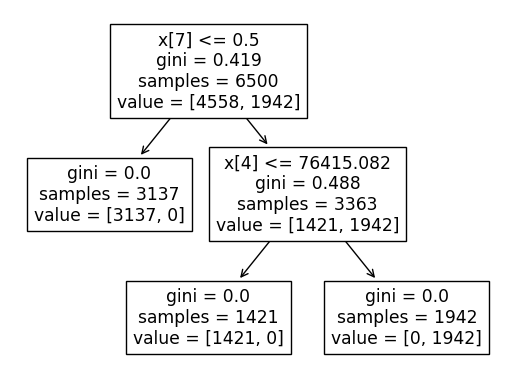

In [40]:
tree.plot_tree(clf)